In [30]:
import pandas as pd
import numpy as np

In [78]:
all_data = pd.read_csv("./Downloads/Automobile_data.csv")

In [79]:
all_data.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450


#### Q1 : Replace all column values which contain ‘?’ and n.a. with NaN.

In [80]:
all_data[all_data.isna().any(axis=1)]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price


In [81]:
all_data = all_data.replace(['?','n.a.'], np.NaN) 

In [82]:
all_data[all_data.isna().any(axis=1)]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
22,31,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
23,32,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
47,63,porsche,hatchback,98.4,175.7,dohcv,eight,288,17,NaN


#### Q2 : Find the most expensive car company name

#### In order to take aggregation on Price , convert it to Integer from char 

In [83]:
all_data['price'].astype(int)

ValueError: cannot convert float NaN to integer

#### as Price as NaN values , default it to 0 

In [84]:
all_data['price'] = all_data['price'].replace(np.nan, 0)

In [85]:
all_data['price'] = all_data['price'].astype(int)

In [86]:
all_data.dtypes

index                 int64
company              object
body-style           object
wheel-base          float64
length              float64
engine-type          object
num-of-cylinders     object
horsepower            int64
average-mileage       int64
price                 int32
dtype: object

#### Approach 1   :  Find Most expensive car using  grouping & sorting method

In [87]:
result = all_data.groupby('price').max().sort_values(by='price',ascending=False).head(1)
result[['company']]

,company
price,
45400,mercedes-benz


#### Approach 2 : find max price using filter clause

In [92]:
filt = (all_data.price == all_data['price'].max())
all_data [['company','price']].loc[filt]

,company,price
35,mercedes-benz,45400


#### Q3 : Print All Toyota Cars details

#### Approach 1 : using Filter clause

In [93]:
filt = (all_data['company'] ==  'toyota')
all_data.loc[filt]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
48,66,toyota,hatchback,95.7,158.7,ohc,four,62,35,5348
49,67,toyota,hatchback,95.7,158.7,ohc,four,62,31,6338
50,68,toyota,hatchback,95.7,158.7,ohc,four,62,31,6488
51,69,toyota,wagon,95.7,169.7,ohc,four,62,31,6918
52,70,toyota,wagon,95.7,169.7,ohc,four,62,27,7898
53,71,toyota,wagon,95.7,169.7,ohc,four,62,27,8778
54,79,toyota,wagon,104.5,187.8,dohc,six,156,19,15750


#### Approach 2 : using aggregation clause

In [95]:
car_Manufacturers = all_data.groupby('company')
toyotaDf = car_Manufacturers.get_group('toyota')
toyotaDf

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
48,66,toyota,hatchback,95.7,158.7,ohc,four,62,35,5348
49,67,toyota,hatchback,95.7,158.7,ohc,four,62,31,6338
50,68,toyota,hatchback,95.7,158.7,ohc,four,62,31,6488
51,69,toyota,wagon,95.7,169.7,ohc,four,62,31,6918
52,70,toyota,wagon,95.7,169.7,ohc,four,62,27,7898
53,71,toyota,wagon,95.7,169.7,ohc,four,62,27,8778
54,79,toyota,wagon,104.5,187.8,dohc,six,156,19,15750


##### Q4 : Count total cars per company

In [100]:
results = all_data.groupby('company').count()

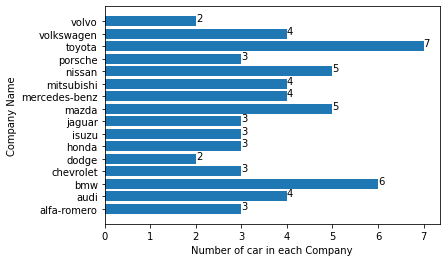

In [114]:
import matplotlib.pyplot as plt

companies = []
for company , pd in all_data.groupby('company') : 
    companies.append(company)

plt.barh(companies,results['body-style']) 
plt.ylabel("Company Name")
plt.xlabel("Number of car in each Company")

for index, value in enumerate(results['body-style']):
    plt.text(value, index, str(value))
    
plt.show() 

#### Q5 : Find each company’s highest price car

In [117]:
result = all_data.groupby('company') 
result['price'].max()

company
alfa-romero      16500
audi             18920
bmw              41315
chevrolet         6575
dodge             6377
honda            12945
isuzu             6785
jaguar           36000
mazda            18344
mercedes-benz    45400
mitsubishi        8189
nissan           13499
porsche          37028
toyota           15750
volkswagen        9995
volvo            13415
Name: price, dtype: int32

#### Q6 : Find the average mileage of each car making company

In [119]:
result = all_data.groupby('company') 
result['average-mileage'].mean()

company
alfa-romero      20.333333
audi             20.000000
bmw              19.000000
chevrolet        41.000000
dodge            31.000000
honda            26.333333
isuzu            33.333333
jaguar           14.333333
mazda            28.000000
mercedes-benz    18.000000
mitsubishi       29.500000
nissan           31.400000
porsche          17.000000
toyota           28.714286
volkswagen       31.750000
volvo            23.000000
Name: average-mileage, dtype: float64

#### Q7 : Sort all cars by Price & horsepower column in decending Order

In [121]:
all_data.sort_values(by=['price','horsepower'],ascending=False)

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
35,47,mercedes-benz,hardtop,112.0,199.2,ohcv,eight,184,14,45400
11,14,bmw,sedan,103.5,193.8,ohc,six,182,16,41315
34,46,mercedes-benz,sedan,120.9,208.1,ohcv,eight,184,14,40960
46,62,porsche,convertible,89.5,168.9,ohcf,six,207,17,37028
12,15,bmw,sedan,110.0,197.0,ohc,six,182,15,36880
...,...,...,...,...,...,...,...,...,...,...
27,36,mazda,hatchback,93.1,159.1,ohc,four,68,30,5195
13,16,chevrolet,hatchback,88.4,141.1,l,three,48,47,5151
47,63,porsche,hatchback,98.4,175.7,dohcv,eight,288,17,0
22,31,isuzu,sedan,94.5,155.9,ohc,four,70,38,0


##### Q8 : Find the different Body-style , company and display max price for each company and body-style combination.  

In [133]:
result = all_data.groupby(['body-style','company'])
result['price'].max()

body-style   company      
convertible  alfa-romero      16500
             porsche          37028
hardtop      mercedes-benz    45400
             porsche          34028
hatchback    alfa-romero      16500
             chevrolet         6295
             dodge             6377
             mazda            11845
             mitsubishi        6189
             porsche              0
             toyota            6488
sedan        audi             17450
             bmw              41315
             chevrolet         6575
             honda            12945
             isuzu             6785
             jaguar           36000
             mazda            18344
             mercedes-benz    40960
             mitsubishi        8189
             nissan           13499
             volkswagen        9995
             volvo            12940
wagon        audi             18920
             honda             7295
             mercedes-benz    28248
             nissan            7349
 

#### Q9 Concatenate two data frames using the following conditions
###### Create two data frames using the below two Dicts, Concatenate those two data frames and create a key for each data frame.

In [136]:
import pandas as pd
GermanCars = {'Company': ['Ford', 'Mercedes', 'BMV', 'Audi'], 'Price': [23845, 171995, 135925 , 71400]}
japaneseCars = {'Company': ['Toyota', 'Honda', 'Nissan', 'Mitsubishi '], 'Price': [29995, 23600, 61500 , 58900]}

In [141]:
GermanCars_df = pd.DataFrame(GermanCars)
japaneseCars_df = pd.DataFrame(japaneseCars)
pd.concat([GermanCars_df,japaneseCars_df], keys=["Germany", "Japan"])

Company   Price
Germany 0         Ford   23845
        1     Mercedes  171995
        2          BMV  135925
        3         Audi   71400
Japan   0       Toyota   29995
        1        Honda   23600
        2       Nissan   61500
        3  Mitsubishi    58900

##### Q10 : Merge two data frames using the following condition
###### Create two data frames using the below two Dicts, Merge two data frames, and append the second data frame as a new column to the first data frame.

In [142]:
Car_Price = {'Company': ['Toyota', 'Honda', 'BMV', 'Audi'], 'Price': [23845, 17995, 135925 , 71400]}
car_Horsepower = {'Company': ['Toyota', 'Honda', 'BMV', 'Audi'], 'horsepower': [141, 80, 182 , 160]}

In [143]:
Car_Price_df = pd.DataFrame(Car_Price)
car_Horsepower_df = pd.DataFrame(car_Horsepower)
merged_left = pd.merge(left=Car_Price_df, right=car_Horsepower_df, left_on='Company', right_on='Company')
merged_left

,Company,Price,horsepower
0,Toyota,23845,141
1,Honda,17995,80
2,BMV,135925,182
3,Audi,71400,160
